### **VGG 16**

Imports

In [36]:
from google.colab import drive
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import itertools
import pandas
import seaborn as sns
sns.set_style('darkgrid')
import random
import keras
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, AveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import VGG16
from keras.models import Model
import matplotlib.cm as cm
import cv2

Check if Connected to GPU

In [10]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

SystemError: ignored

Mount Drive

In [4]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


Data Download


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"
%cd /content/gdrive/MyDrive/Kaggle
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database
!unzip \*.zip  && rm *.zip
data_path = "/content/gdrive/MyDrive/vgg"
os.mkdir(data_path)
data_path_train = "/content/gdrive/MyDrive/vgg/train"
os.mkdir(data_path_train)
data_path_val = "/content/gdrive/MyDrive/vgg/validation"
os.mkdir(data_path_val)
data_path_test = "/content/gdrive/MyDrive/vgg/test"
os.mkdir(data_path_test)
data_path_train_c = "/content/gdrive/MyDrive/vgg/train/covid"
os.mkdir(data_path_train_c)
data_path_val_c = "/content/gdrive/MyDrive/vgg/validation/covid"
os.mkdir(data_path_val_c)
data_path_test_c = "/content/gdrive/MyDrive/vgg/test/covid"
os.mkdir(data_path_test_c)
covid_train = ['COVID-{}.png'.format(i) for i in range(1,1001)]
for ct in covid_train:
    src1 = os.path.join('/content/gdrive/MyDrive/Kaggle/COVID-19_Radiography_Dataset/COVID/images', ct)
    dst1 = os.path.join('/content/gdrive/MyDrive/vgg/train/covid', ct)
    shutil.copyfile(src1, dst1)
covid_val = ['COVID-{}.png'.format(i) for i in range(1001,1201)]
for cv in covid_val:
    src2 = os.path.join('/content/gdrive/MyDrive/Kaggle/COVID-19_Radiography_Dataset/COVID/images', cv)
    dst2 = os.path.join('/content/gdrive/MyDrive/vgg/validation/covid', cv)
    shutil.copyfile(src2, dst2)
covid_test = ['COVID-{}.png'.format(i) for i in range(1201,1301)]
for ce in covid_test:
    src3 = os.path.join('/content/gdrive/MyDrive/Kaggle/COVID-19_Radiography_Dataset/COVID/images', ce)
    dst3 = os.path.join('/content/gdrive/MyDrive/vgg/test/covid', ce)
    shutil.copyfile(src3, dst3)
data_path_train_n = "/content/gdrive/MyDrive/vgg/train/normal"
os.mkdir(data_path_train_n)
data_path_val_n = "/content/gdrive/MyDrive/vgg/validation/normal"
os.mkdir(data_path_val_n)
data_path_test_n = "/content/gdrive/MyDrive/vgg/test/normal"
os.mkdir(data_path_test_n)
normal_train = ['Normal-{}.png'.format(i) for i in range(1,1001)]
for nt in normal_train:
    src4 = os.path.join('/content/gdrive/MyDrive/Kaggle/COVID-19_Radiography_Dataset/Normal/images', nt)
    dst4 = os.path.join('/content/gdrive/MyDrive/vgg/train/normal', nt)
    shutil.copyfile(src4, dst4)
normal_val = ['Normal-{}.png'.format(i) for i in range(1001,1201)]
for nv in normal_val:
    src5 = os.path.join('/content/gdrive/MyDrive/Kaggle/COVID-19_Radiography_Dataset/Normal/images', nv)
    dst5 = os.path.join('/content/gdrive/MyDrive/vgg/validation/normal', nv)
    shutil.copyfile(src5, dst5)
normal_test = ['Normal-{}.png'.format(i) for i in range(1201,1301)]
for ne in normal_test:
    src6 = os.path.join('/content/gdrive/MyDrive/Kaggle/COVID-19_Radiography_Dataset/Normal/images', ne)
    dst6 = os.path.join('/content/gdrive/MyDrive/vgg/test/normal', ne)
    shutil.copyfile(src6, dst6)
data_path_train_v = "/content/gdrive/MyDrive/vgg/train/viral_pneumonia"
os.mkdir(data_path_train_v)
data_path_val_v = "/content/gdrive/MyDrive/vgg/validation/viral_pneumonia"
os.mkdir(data_path_val_v)
data_path_test_v = "/content/gdrive/MyDrive/vgg/test/viral_pneumonia"
os.mkdir(data_path_test_v)
viral_train = ['Viral Pneumonia-{}.png'.format(i) for i in range(1,1001)]
for vt in viral_train:
    src7 = os.path.join('/content/gdrive/MyDrive/Kaggle/COVID-19_Radiography_Dataset/Viral Pneumonia/images', vt)
    dst7 = os.path.join('/content/gdrive/MyDrive/vgg/train/viral_pneumonia', vt)
    shutil.copyfile(src7, dst7)
viral_val = ['Viral Pneumonia-{}.png'.format(i) for i in range(1001,1201)]
for vv in viral_val:
    src8 = os.path.join('/content/gdrive/MyDrive/Kaggle/COVID-19_Radiography_Dataset/Viral Pneumonia/images', vv)
    dst8 = os.path.join('/content/gdrive/MyDrive/vgg/validation/viral_pneumonia', vv)
    shutil.copyfile(src8, dst8)
viral_test = ['Viral Pneumonia-{}.png'.format(i) for i in range(1201,1301)]
for ve in viral_test:
    src9 = os.path.join('/content/gdrive/MyDrive/Kaggle/COVID-19_Radiography_Dataset/Viral Pneumonia/images', ve)
    dst9 = os.path.join('/content/gdrive/MyDrive/vgg/test/viral_pneumonia', ve)
    shutil.copyfile(src9, dst9)

Setting Data Paths

In [5]:
data_path = "/content/gdrive/MyDrive/vgg"
data_path_train = "/content/gdrive/MyDrive/vgg/train"
data_path_val = "/content/gdrive/MyDrive/vgg/validation"
data_path_test = "/content/gdrive/MyDrive/vgg/test"
data_path_train_c = "/content/gdrive/MyDrive/vgg/train/covid"
data_path_val_c = "/content/gdrive/MyDrive/vgg/validation/covid"
data_path_test_c = "/content/gdrive/MyDrive/vgg/test/covid"
data_path_train_n = "/content/gdrive/MyDrive/vgg/train/normal"
data_path_val_n = "/content/gdrive/MyDrive/vgg/validation/normal"
data_path_test_n = "/content/gdrive/MyDrive/vgg/test/normal"
data_path_train_v = "/content/gdrive/MyDrive/vgg/train/viral_pneumonia"
data_path_val_v = "/content/gdrive/MyDrive/vgg/validation/viral_pneumonia"
data_path_test_v = "/content/gdrive/MyDrive/vgg/test/viral_pneumonia"

Preprocessing

In [6]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
image_height = 224
image_width = 224
batch_size = 64
train_data_configuration = ImageDataGenerator(rescale = 1./255, rotation_range=45, height_shift_range=0.2, width_shift_range=0.2, shear_range = 0.2, zoom_range=0.2,
                                                horizontal_flip = True, fill_mode ='nearest')
train_dataset = train_data_configuration.flow_from_directory(directory=data_path_train, target_size=(image_height,image_width), batch_size=batch_size, class_mode='categorical', shuffle=True)
validation_data_configuration = ImageDataGenerator(rescale=1./255)
validation_dataset = validation_data_configuration.flow_from_directory(directory=data_path_val, target_size=(image_height,image_width), batch_size =batch_size, class_mode='categorical', shuffle=False)
test_data_configuration = ImageDataGenerator(rescale=1./255)
test_dataset = test_data_configuration.flow_from_directory(directory=data_path_test, target_size=(image_height,image_width), batch_size =batch_size, class_mode='categorical', shuffle=False)
print(train_dataset.n)
print(validation_dataset.n)
print(test_dataset.n)

Found 3000 images belonging to 3 classes.
Found 600 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
3000
600
300


VGG Architecture Setup

In [7]:
base = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
for layer in base.layers:
    layer.trainable = False
head = base.output
head = AveragePooling2D()(head)
head = Flatten()(head)
head = Dense(128, activation="relu")(head)
head = Dropout(0.2)(head)
head = Dense(3, activation='softmax')(head)
model = Model(inputs=base.input, outputs=head)
model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

Optimizer and Run VGG

In [18]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
epochs = 3
model_output = model.fit_generator(train_dataset, validation_data=validation_dataset, verbose=1, epochs=epochs)

Epoch 1/3
47/47 [==============================] - 1485s 32s/step - loss: 0.4306 - accuracy: 0.8603 - val_loss: 0.3548 - val_accuracy: 0.8717
Epoch 2/3
47/47 [==============================] - 1457s 31s/step - loss: 0.3837 - accuracy: 0.8717 - val_loss: 0.4599 - val_accuracy: 0.8033
Epoch 3/3
47/47 [==============================] - 1462s 31s/step - loss: 0.3617 - accuracy: 0.8790 - val_loss: 0.3383 - val_accuracy: 0.8583


Save VGG

In [31]:
model.save('cp.h5')

Setting Up/Printing Graphs




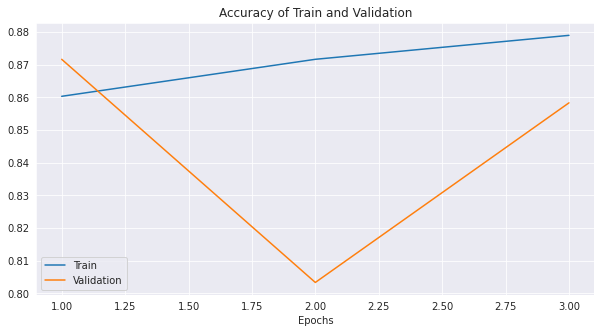

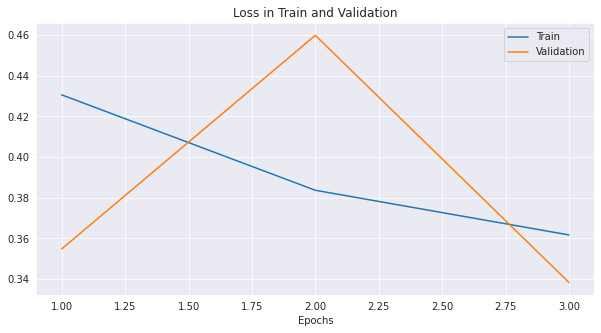

In [43]:
train_steps_per_epoch = train_dataset.samples//batch_size
validation_steps_per_epoch = validation_dataset.samples//batch_size
test_steps_per_epoch = test_dataset.samples//batch_size
train_accuracy = model_output.history['accuracy']
validation_accuracy = model_output.history['val_accuracy']
train_loss = model_output.history['loss']
validation_loss = model_output.history['val_loss']
epochs_values = []
for i in range(1, epochs + 1):
    epochs_values.append(i)
plt.figure(figsize=(10,5))
plt.plot(epochs_values, train_accuracy, label='Train')
plt.plot(epochs_values, validation_accuracy, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.title('Accuracy of Train and Validation')
#plt.savefig('train_validation_accuracy.jpg')
plt.show()
plt.figure(figsize=(10,5))
plt.plot(epochs_values, train_loss, label='Train')
plt.plot(epochs_values, validation_loss, label='Validation')
plt.legend()
plt.xlabel('Epochs')
plt.title('Loss in Train and Validation')
#plt.savefig('train_validation_loss.jpg')
plt.show()

Confusion Matrix

In [44]:
test_prediction = model.predict_generator(test_dataset,test_steps_per_epoch+1)
test_prediction_classes = np.argmax(test_prediction,axis=1)

In [ ]:
confusion_matrix_result = confusion_matrix(test_dataset.classes, test_prediction_classes)
#print("The confusion matrix is:",confusion_matrix_result)

In [45]:
def confusion_matrix(confusion_matrix, label_names):
    accuracy_rate = np.trace(confusion_matrix)/float(np.sum(confusion_matrix))
    error_rate = 1 - accuracy_rate
    plt.figure(figsize=(10, 8))
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title('Confusion matrix')
    plt.colorbar()
    tick = np.arange(len(label_names))
    plt.xticks(tick, label_names, rotation=45)
    plt.yticks(tick, label_names)
    confusion_mat = np.round(confusion_matrix.astype('float32') / confusion_matrix.sum(axis=1), 2)
    threshold = confusion_mat.max() / 1.5
    matrix_product = itertools.product(range(confusion_mat.shape[0]), range(confusion_mat.shape[1]))
    for i, j in matrix_product:
        plt.text(j, i, "{:0.2f}".format(confusion_mat[i, j]), horizontalalignment="center", color="white" if confusion_mat[i, j] > threshold else "black")
    plt.tight_layout()
    plt.ylabel('Target class')
    plt.xlabel("Output class\n accuracy rate = {:0.2f}\n error rate = {:0.2f}".format(accuracy_rate, error_rate))
    #plt.savefig('confusion_matrix.jpg')
    plt.show()


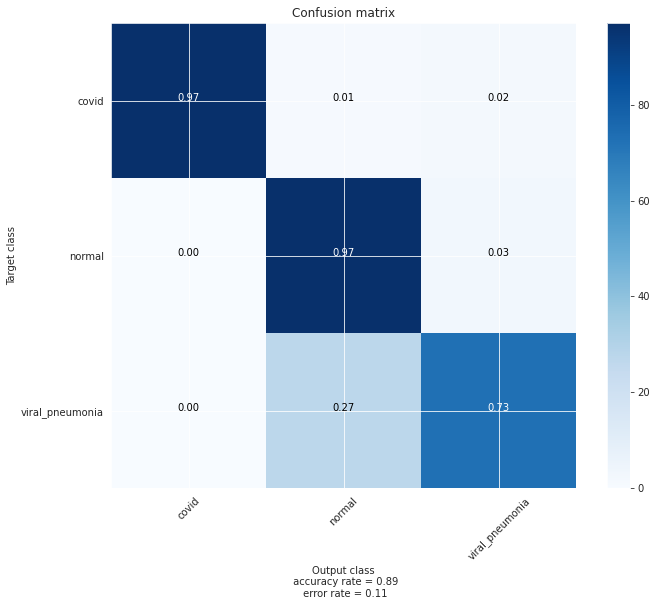

{'covid': {'precision': 1.0, 'recall': 0.97, 'f1-score': 0.9847715736040609, 'support': 100}, 'normal': {'precision': 0.776, 'recall': 0.97, 'f1-score': 0.8622222222222223, 'support': 100}, 'viral_pneumonia': {'precision': 0.9358974358974359, 'recall': 0.73, 'f1-score': 0.8202247191011236, 'support': 100}, 'accuracy': 0.89, 'macro avg': {'precision': 0.9039658119658119, 'recall': 0.89, 'f1-score': 0.8890728383091355, 'support': 300}, 'weighted avg': {'precision': 0.903965811965812, 'recall': 0.89, 'f1-score': 0.8890728383091355, 'support': 300}}


In [49]:
labels = ["covid", "normal", "viral_pneumonia"]
confusion_matrix(confusion_matrix_result, label_names=labels)
report = classification_report(test_dataset.classes, test_prediction_classes, target_names=labels, output_dict=True)
report_df = pandas.DataFrame(report).transpose()
print(report)